# Benchmarking Qmachines with different RB protocols

In [1]:
!pip install tqdm

In [2]:
from RB_stabilizer_verification import machine_response_stabilizer_bench
from RB_standard_verification import machine_response_standard_bench
from RB_with_Rigetti_native_gates import machine_response_srb_native_gate
from RB_standard_verification_with_arbitrary_random_unitaries import machine_response_standard_bench_random_units
from functions import averageOfFidelity
from pyquil import get_qc

In [3]:
from tqdm import tqdm
import matplotlib.pyplot as plt
import os
import numpy as np
import seaborn as sns

In [26]:
k_m = 20
n_m = 100
n_qubit = 2

# qmachine = get_qc( str(2) + "q-qvm" )
qmachine = get_qc("9q-square-noisy-qvm")
# qmachine = get_qc( str(n_qubit) + 'q-qvm')  # You can make any 'nq-qvm'
# qmachine = get_qc('Aspen-11',execution_timeout=60, compiler_timeout=100)

max_layer_num = 20
avg_std_fdlty_list = []
avg_stab_fdlty_list = []
avg_rng_fdlty_list = []
avg_runitary_fdlty_list = []

In [27]:
path = os.path.join( os.getcwd(), 'output_storage' )

In [28]:
sns.set_theme(context='paper', font= 'Serif', style = 'ticks')

## RB standard version (with Clifford set)

In [29]:
for m in tqdm(range(1,max_layer_num+1,2)):
    standard_response = machine_response_standard_bench(qmachine, n_qubit, m, k_m, n_m)
    avg_std_fdlty_list.append( averageOfFidelity(standard_response) )

np.save( os.path.join(path,'rb_standard_{}_layers.npy'.format(max_layer_num)) ,np.array(avg_std_fdlty_list))    

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [01:16<00:00,  7.62s/it]


Text(0, 0.5, 'Average of Fidelity')

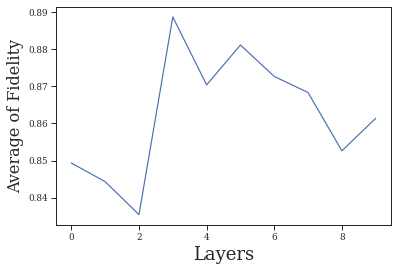

In [30]:
plt.plot(avg_std_fdlty_list)
plt.xlabel('Layers', fontsize=18)
plt.ylabel('Average of Fidelity', fontsize=16)

## RB stabilizer version (with Clifford set)

In [9]:
for m in tqdm(range(1,max_layer_num+1)):
    stabilizer_response = machine_response_stabilizer_bench(qmachine, n_qubit, m, k_m, n_m)
    avg_stab_fdlty_list.append( averageOfFidelity(stabilizer_response) )
np.save( os.path.join(path,'rb_stabilizer_{}_layers.npy'.format(max_layer_num)) ,np.array(avg_stab_fdlty_list))    

 20%|████████████████▌                                                                  | 2/10 [00:09<00:39,  4.88s/it]


KeyboardInterrupt: 

In [ ]:
plt.plot(avg_stab_fdlty_list)
plt.xlabel('Layers', fontsize=18)
plt.ylabel('Average of Fidelity', fontsize=16)

## RB standard version (with Riggetti native gate set)

In [15]:
for m in tqdm(range(1,max_layer_num+1)):
    avg_rng_fdlty_list.append(averageOfFidelity(machine_response_srb_native_gate(qmachine, n_qubit, m, k_m, n_m)))

np.save( os.path.join(path,'rb_native_standard_{}_layers.npy'.format(max_layer_num)) ,np.array(avg_rng_fdlty_list))

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:08<00:00,  1.13it/s]


Text(0, 0.5, 'Average of Fidelity')

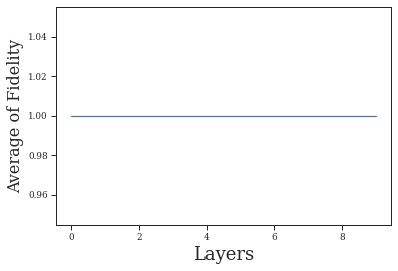

In [16]:
plt.plot(avg_rng_fdlty_list)
plt.xlabel('Layers', fontsize=18)
plt.ylabel('Average of Fidelity', fontsize=16)

## RB standard version (with arbitary random unitary set)

In [ ]:
for m in tqdm(range(1,max_layer_num+1)):
    avg_runitary_fdlty_list.append(averageOfFidelity(machine_response_standard_bench_random_units(qmachine, n_qubit, m, k_m, n_m)))

np.save( os.path.join(path,'rb_random_unitary_standard_{}_layers.npy'.format(max_layer_num)) ,np.array(avg_runitary_fdlty_list))    

In [ ]:
plt.plot(avg_runitary_fdlty_list)
plt.xlabel('Layers', fontsize=18)
plt.ylabel('Average of Fidelity', fontsize=16)